In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter Notebooks
%matplotlib inline

#Load the training data
train_df = pd.read_csv('train.csv')

#Quick preview
print(train_df.shape)
train_df.head()


(750000, 9)


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [4]:
#check missing values
missing_values=train_df.isnull().sum()

In [5]:
missing_values

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [6]:
#check summary stats 
summary_stats=train_df.describe()

In [7]:
summary_stats

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [8]:
#check unique values
unique_values =train_df.nunique()

In [9]:
unique_values

id            750000
Sex                2
Age               60
Height            86
Weight            91
Duration          30
Heart_Rate        63
Body_Temp         75
Calories         277
dtype: int64

In [ ]:
#lets check how is the Traget distributed "Calories" for better model desiging  

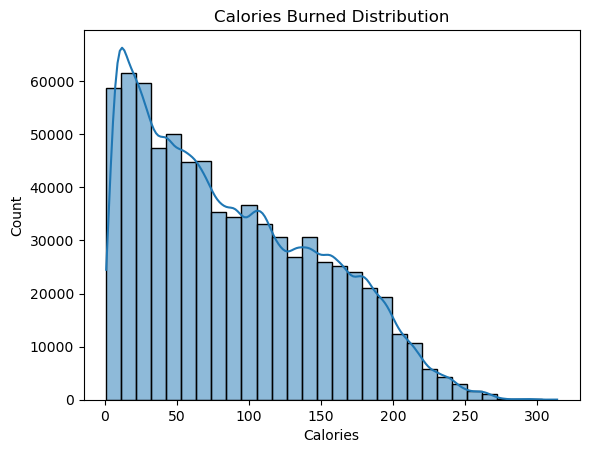

In [12]:

#distribution of colarios 
sns.histplot(train_df['Calories'], kde=True, bins=30)
plt.title('Calories Burned Distribution')
plt.xlabel('Calories')
plt.show()
#found Histogram bars stacked mostly toward the left (0–100), showing many samples with low calorie burn.

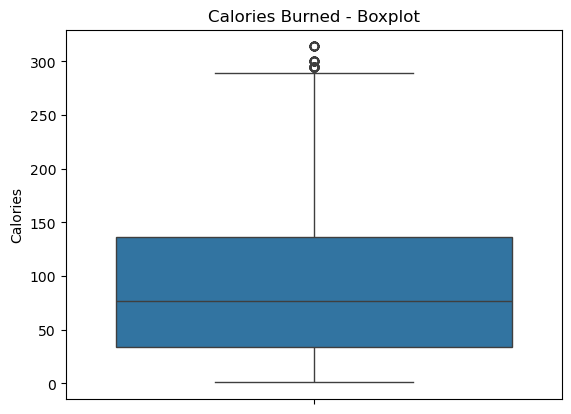

In [13]:
#check for outliers 
sns.boxplot(y=train_df['Calories'])
plt.title('Calories Burned - Boxplot')
plt.show()


In [ ]:
# Explore Input features to the Target

<Axes: xlabel='Sex', ylabel='Calories'>

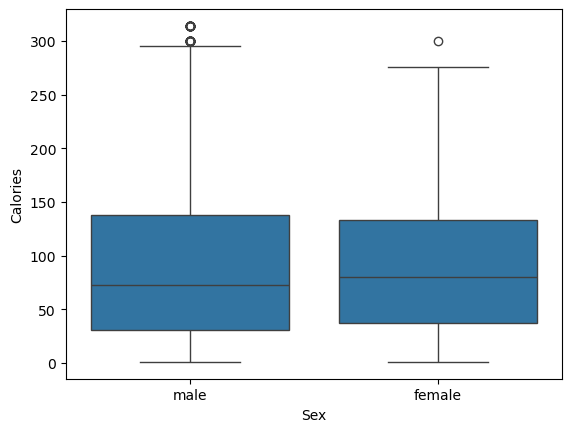

In [14]:
#sex 
sns.boxplot(x='Sex',y='Calories',data=train_df)

In [15]:
#full stats 
train_df.groupby('Sex')['Calories'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max'
)


,count,mean,median,min,max
Sex,,,,,
female,375721,87.534761,80.0,1.0,300.0
male,374279,89.033683,73.0,1.0,314.0


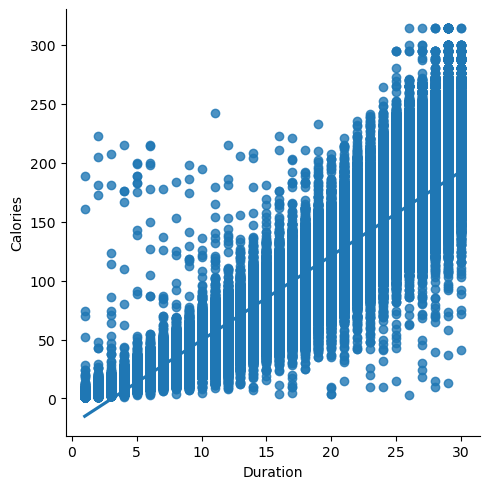

In [16]:
#Explore Duration impact to Calories "Target"
#As Duration increases, Calories burned also increases which indcates positive linear relationship: 
sns.lmplot(x='Duration', y='Calories', data=train_df)


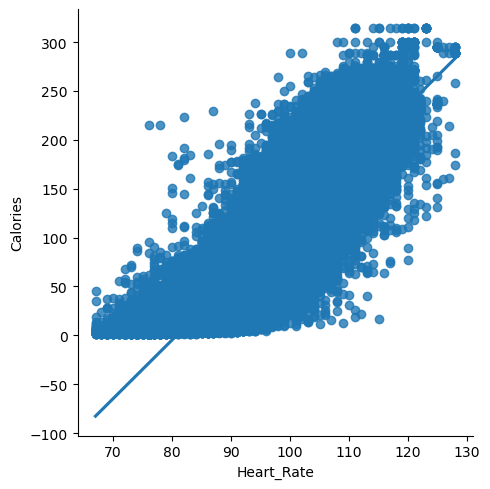

In [17]:
#Explore Heart_Rate impact to Calories "Target"
sns.lmplot(x='Heart_Rate', y='Calories', data=train_df)

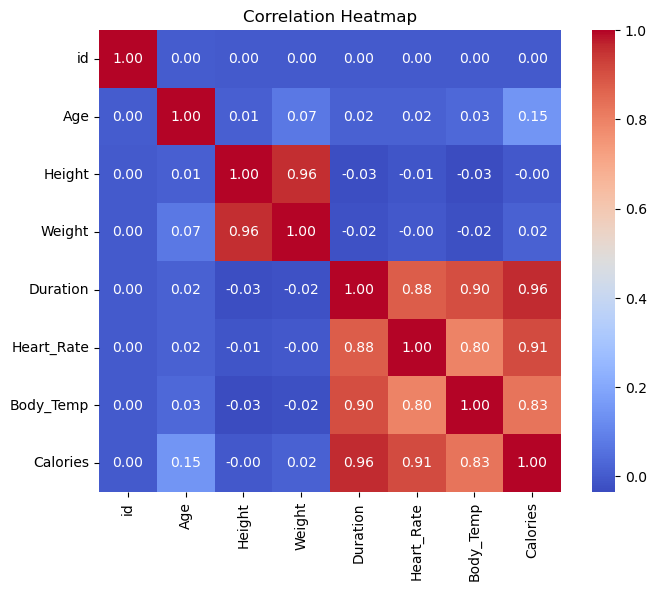

In [2]:
#check correlation between features and the target 
#Height and Weight alone aren't helpful although Age may have some minor effect
# Compute correlation matrix
corr_matrix = train_df.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()
